In [1]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# Set the random seed for reproducibility
np.random.seed(1234)
import json

/home/yshen/miniconda3/envs/umap/lib/python3.8/site-packages/umap/distances.py:1053: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/yshen/miniconda3/envs/umap/lib/python3.8/site-packages/umap/distances.py:1061: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/yshen/miniconda3/envs/umap/lib/python3.8/site-packages/umap/distances.

In [2]:
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('NK0.csv')

genotype_list = df['Genotype'].tolist()
phenotype_list = df['Phenotype'].tolist()

In [3]:
def seq_to_oh(sequence):
    onehot=[]
    diction =[['A'], ['C'], ['G'], ['T']]
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(diction)
    for i in range(len(sequence)): 
        sep_seq=list(sequence[i])
        sep_seq=np.array(sep_seq)
        sep_seq=sep_seq.reshape(len(sequence[i]),1)
        A=enc.transform(sep_seq).toarray()
        A=A.reshape(len(sequence[i])*4)
        onehot.append(A)
    onehot=np.array(onehot)
    onehot = onehot.astype('float32')
    return onehot

In [4]:
genotype_list = seq_to_oh(genotype_list)

In [5]:
genotype_list = np.array(genotype_list)
genotype_list.shape

(1048575, 40)

In [ ]:
# from sklearn.manifold import TSNE
# tsne_model = TSNE(n_components=2, perplexity=30, metric='euclidean')
# embedding = tsne_model.fit_transform(genotype_list)
# np.save('embeddings_tsne.npy', embedding)
# embedding.shape

In [6]:
embedding = np.load('embeddings_tsne.npy')

In [7]:
embedding.shape

(1048575, 2)

In [26]:
with open('data_X_K1_random_LHS.txt', 'r') as file:
    sequences = json.load(file)

In [27]:
genotype_list = df['Genotype'].tolist()
indices_0 = [genotype_list.index(seq) for seq in sequences[0] if seq in genotype_list]
indices_1 = [genotype_list.index(seq) for seq in sequences[1] if seq in genotype_list]
indices_2 = [genotype_list.index(seq) for seq in sequences[2] if seq in genotype_list]
indices_3 = [genotype_list.index(seq) for seq in sequences[3] if seq in genotype_list]
indices_4 = [genotype_list.index(seq) for seq in sequences[4] if seq in genotype_list]
extracted_embeddings_0 = embedding[indices_0]
extracted_embeddings_1 = embedding[indices_1]
extracted_embeddings_2 = embedding[indices_2]
extracted_embeddings_3 = embedding[indices_3]
extracted_embeddings_4 = embedding[indices_4]

In [28]:
phenotype_list = np.array(phenotype_list)
all_3d = np.column_stack((embedding, phenotype_list))
batch0_3d = all_3d[indices_0]
batch1_3d = all_3d[indices_1]
batch2_3d = all_3d[indices_2]
batch3_3d = all_3d[indices_3]
batch4_3d = all_3d[indices_4]
pd.DataFrame(all_3d, columns=["x", "y", "phenotype"]).to_csv("all_3d.csv", index=False)
pd.DataFrame(batch0_3d, columns=["x", "y", "phenotype"]).to_csv("batch0_3d.csv", index=False)
pd.DataFrame(batch1_3d, columns=["x", "y", "phenotype"]).to_csv("batch1_3d.csv", index=False)
pd.DataFrame(batch2_3d, columns=["x", "y", "phenotype"]).to_csv("batch2_3d.csv", index=False)
pd.DataFrame(batch3_3d, columns=["x", "y", "phenotype"]).to_csv("batch3_3d.csv", index=False)
pd.DataFrame(batch4_3d, columns=["x", "y", "phenotype"]).to_csv("batch4_3d.csv", index=False)

In [29]:
all_3d.shape

(1048575, 3)

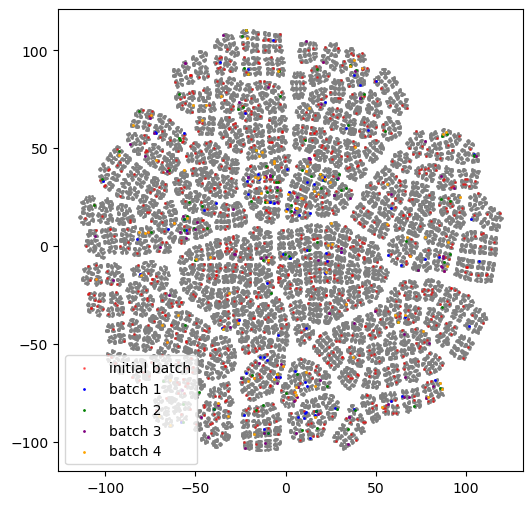

In [34]:
plt.figure(figsize=(6, 6))
scatter = plt.scatter(embedding[:,0],embedding[:,1],c = "grey", s=0.2, alpha=0.05)
scatter = plt.scatter(extracted_embeddings_0[:,0],extracted_embeddings_0[:,1],c = "red", s=1, alpha=0.5, label = "initial batch")
scatter = plt.scatter(extracted_embeddings_1[:,0],extracted_embeddings_1[:,1],c = "blue", s=1, alpha=1, label = "batch 1")
scatter = plt.scatter(extracted_embeddings_2[:,0],extracted_embeddings_2[:,1],c = "green", s=1, alpha=1, label = "batch 2")
scatter = plt.scatter(extracted_embeddings_3[:,0],extracted_embeddings_3[:,1],c = "purple", s=1, alpha=1, label = "batch 3")
scatter = plt.scatter(extracted_embeddings_4[:,0],extracted_embeddings_4[:,1],c = "orange", s=1, alpha=1, label = "batch 4")
plt.legend(loc="lower left")
plt.savefig('tsne_NK1_ALrandom.png')

/tmp/ipykernel_368317/3841945470.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


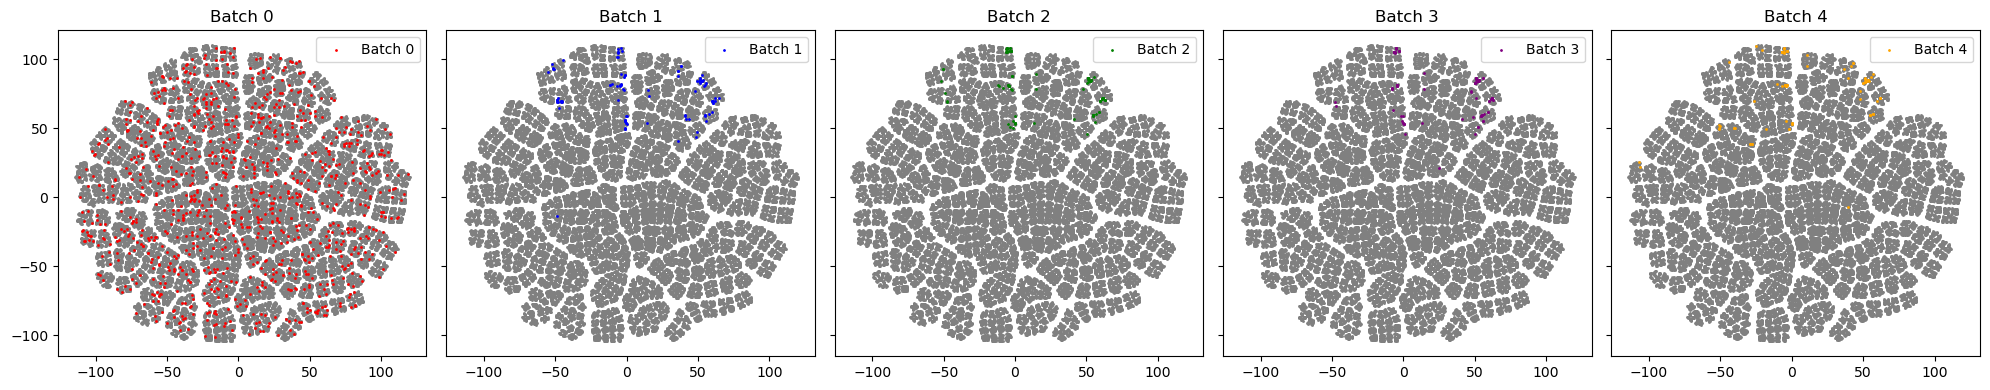

In [61]:
import matplotlib.pyplot as plt

# Create a figure with 5 subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharex=True, sharey=True)

# List of extracted embeddings and their corresponding colors and labels
batches = [
    (extracted_embeddings_0, "red", "Batch 0"),
    (extracted_embeddings_1, "blue", "Batch 1"),
    (extracted_embeddings_2, "green", "Batch 2"),
    (extracted_embeddings_3, "purple", "Batch 3"),
    (extracted_embeddings_4, "orange", "Batch 4"),
]

# Plot each batch in its respective subplot
for i, (batch_embeddings, color, label) in enumerate(batches):
    ax = axes[i]
    # Plot the grey background (all embeddings)
    ax.scatter(embedding[:, 0], embedding[:, 1], c="grey", s=0.2, alpha=0.05)
    # Highlight the current batch
    ax.scatter(batch_embeddings[:, 0], batch_embeddings[:, 1], c=color, s=1, alpha=1, label=label)
    # Add title and legend
    ax.set_title(label)
    ax.legend()

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('tsne_5batches_subplots.png')
plt.show()

In [36]:
df = pd.read_csv('NK2.csv')

genotype_list = df['Genotype'].tolist()
phenotype_list = df['Phenotype'].tolist()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
phenotype_list_scaled = scaler.fit_transform(pd.DataFrame(phenotype_list))


phenotype_list_scaled = phenotype_list_scaled.flatten().tolist()

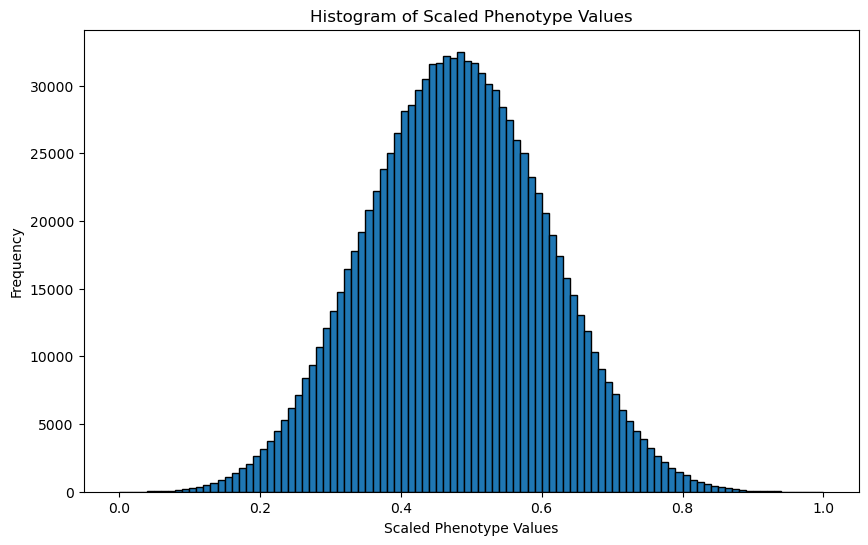

In [37]:
# Plot the histogram with 20 bins
plt.figure(figsize=(10, 6))
plt.hist(phenotype_list_scaled, bins=100, edgecolor='black')
plt.xlabel('Scaled Phenotype Values')
plt.ylabel('Frequency')
plt.title('Histogram of Scaled Phenotype Values')
plt.show()

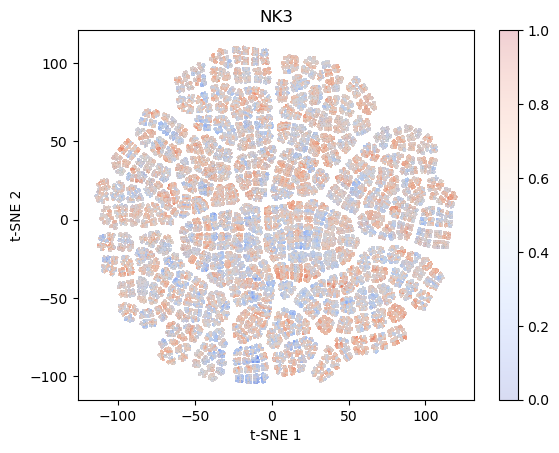

In [28]:
scatter = plt.scatter(embedding[:,0],embedding[:,1],c = phenotype_list_scaled ,cmap = "coolwarm", s=0.2, alpha=0.2)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("NK3")
plt.colorbar(scatter, orientation='vertical')
plt.savefig("NK3.png")
plt.show()